# Gambler's Problem
### Figure 4.3

An excellent explanation on the family of optimal policies in vojtamolda's [repo](https://github.com/vojtamolda/reinforcement-learning-an-introduction/blob/main/chapter04/chapter04.pdf)

How to replicate policy plot in the book https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83

Some experiments with policies in James Teow's blog https://medium.com/@jaems33/gamblers-problem-b4e91040e58a

Solution of exercise 4.9 is at the bottom

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# probability to win the stake
PROBABILITY_HEADS = 0.4

# states with $0 or $100 are not considered as the are terminal
STATES = np.arange(1, 100)

# accuracy
THETA = 1e-9


In [3]:
def actions(state):
    """Get possible actions for a given state

    :param state: State
    :type state: int
    :return: Possible actions
    :rtype: numpy array
    """
    return np.arange(1, min(state, 100 - state) + 1)


def expected_update(values, state, action):
    """Compute expected value for given state and action

    :param values: Current values
    :type: numpy array
    :param state: State
    :type: int
    :param action: Action
    :type: int
    :return: expected value
    :rtype: float
    """
    return PROBABILITY_HEADS * values[state + action] + (1 - PROBABILITY_HEADS) * values[state - action]


def policy_evaluate(values, policy):
    """Policy evaluation

    :return: Difference between old and new value
    :rtype: float
    """
    delta = 0
    for state in STATES:
        old_value = values[state]
        values[state] = max([expected_update(values, state, action) for action in actions(state)])
        delta = max(delta, abs(old_value - values[state]))
    return delta


def policy_improve(values, policy, round_digits=4):
    """Policy improvement

    :param round_digits: Precision of expected value
    :type round_digits: int
    :return: None
    :rtype: None
    """
    for state in STATES:
        _actions = actions(state)
        # to replicate policy plot from the book wee need to round expected values
        # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
        action_values = [round(expected_update(values, state, action), round_digits) for action in _actions]
        optimal_action = _actions[np.argmax(action_values)]
        policy[state] = optimal_action


def value_iteration(values, policy):
    """Value iteration algorithm implementation (page 83)

    :return: Values after each sweep of policy evaluation
    :rtype: list
    """
    values_history = [values]

    sweep = 0
    delta = 1
    while delta >= THETA:
        delta = policy_evaluate(values, policy)
        sweep += 1
        values_history.append(copy.deepcopy(values))
    return values_history


def plot(values_history, values, policy):
    """Plot values and policy

    :param values_history: Values after each sweep of policy evaluation
    :type values_history: list
    :param policy: Policy
    :type policy: numpy array
    :return: None
    :rtype: None
    """
    plt.figure()
    plt.subplot(2, 1, 1)

    values_history_sweeps = (1, 2, 3, len(values_history)//2)
    for sweep in values_history_sweeps:
        plt.plot(values_history[sweep], label=f'sweep {sweep}')
    plt.plot(values, label='sweep final')

    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.bar(np.arange(len(policy)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()


def fig4_3(round_digits=4):
    values = np.zeros(101)
    values[100] = 1
    policy = np.zeros(101)
    values_history = value_iteration(values, policy)
    policy_improve(values, policy, round_digits)
    plot(values_history, values, policy)


To replicate the policy plot from the RL book we need to exclude 0 dollar bets in actions() function.

Also we need to round the expected values in function policy_improve():

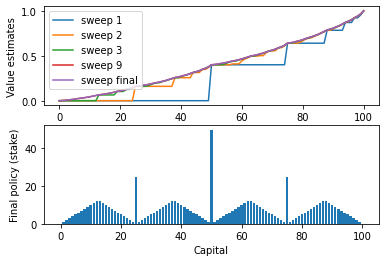

In [4]:
fig4_3(round_digits=4)

In [5]:
def plot_policy(round_digits=4):
    values = np.zeros(101)
    values[100] = 1
    policy = np.zeros(101)
    
    values_history = value_iteration(values, policy)
    policy_improve(values, policy, round_digits)
    plt.bar(np.arange(len(policy)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()

We get other results with other round precisions:

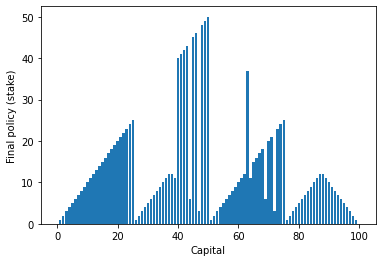

In [6]:
plot_policy(round_digits=15)

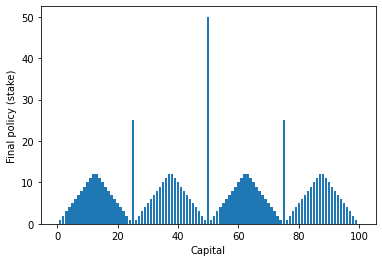

In [7]:
plot_policy(round_digits=4)

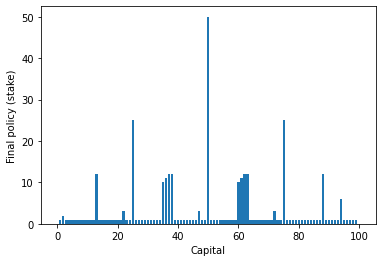

In [8]:
plot_policy(round_digits=2)

Including zero bets to policy yields other results:

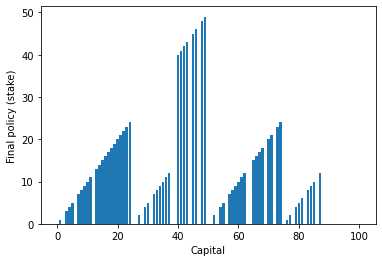

In [9]:
def actions(state):
    """Get possible actions for a given state

    :param state: State
    :type state: int
    :return: Possible actions
    :rtype: numpy array
    """
    return np.arange(0, min(state, 100 - state) + 1)

plot_policy(round_digits=300)

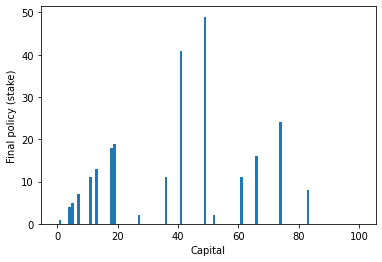

In [10]:
plot_policy(round_digits=10)

It's stated in the book that there is a family of optimal policies.

Vojtamolda in his [repo](https://github.com/vojtamolda/reinforcement-learning-an-introduction/blob/main/chapter04/chapter04.pdf) gives reasonable explanation on how does this family should look like. According to his explanation all policies above are Ok.

Plots for exercise 4.9 goes below:

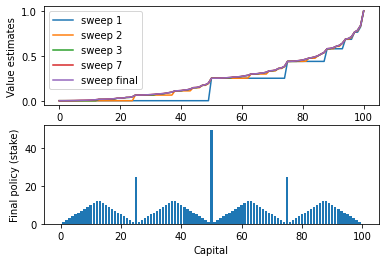

In [11]:
PROBABILITY_HEADS = 0.25
def actions(state):
    """Get possible actions for a given state

    :param state: State
    :type state: int
    :return: Possible actions
    :rtype: numpy array
    """
    return np.arange(1, min(state, 100 - state) + 1)
fig4_3(round_digits=5)


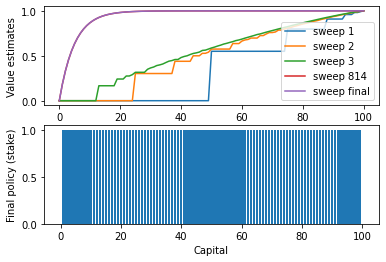

In [13]:
PROBABILITY_HEADS = 0.55
fig4_3(round_digits=5)